In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1= pd.read_csv('/kaggle/input/process-data-for-predictive-maintenance/iiot_30min_norm.csv')
df2= pd.read_csv('/kaggle/input/process-data-for-predictive-maintenance/manual_30min_norm.csv')

In [2]:
df1.head()
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    720 non-null    object 
 1   FM1     720 non-null    float64
 2   PE1     720 non-null    float64
 3   PE2     720 non-null    float64
 4   PE3     720 non-null    float64
 5   PE4     720 non-null    float64
 6   TP1     720 non-null    float64
 7   TP2     720 non-null    float64
 8   EPOCH   720 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 50.8+ KB


,FM1,PE1,PE2,PE3,PE4,TP1,TP2,EPOCH
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,7.200000e+02
mean,0.401405,0.935561,0.960597,0.907572,0.789629,0.375372,0.606721,1.594630e+09
std,0.113317,0.006896,0.038904,0.042093,0.051314,0.217120,0.138403,3.743825e+05
min,0.000000,0.922572,0.277070,0.023603,0.000000,0.000000,0.000000,1.593983e+09
25%,0.314962,0.931487,0.959694,0.905535,0.781885,0.201964,0.512354,1.594306e+09
50%,0.385196,0.934538,0.963252,0.910945,0.789128,0.343614,0.599224,1.594630e+09
75%,0.455849,0.938069,0.966236,0.917138,0.811603,0.511152,0.714562,1.594953e+09
max,1.000000,0.974454,1.000000,0.944446,0.840141,1.000000,1.000000,1.595277e+09


In [3]:
df2.head()
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110641 entries, 0 to 110640
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TIME    110641 non-null  object 
 1   FM1     110641 non-null  float64
 2   PE1     110641 non-null  float64
 3   PE2     110641 non-null  float64
 4   PE3     110641 non-null  float64
 5   PE4     110641 non-null  float64
 6   TP1     110641 non-null  float64
 7   EPOCH   110641 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 6.8+ MB


,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
count,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,1.106410e+05
mean,0.468309,0.561586,0.585491,0.524408,0.399311,0.396514,1.478866e+09
std,0.258924,0.059871,0.040076,0.125889,0.125387,0.080811,5.749101e+07
min,0.000000,0.461538,0.138462,0.123077,0.000000,0.000000,1.379290e+09
25%,0.264587,0.511218,0.553846,0.553846,0.373054,0.368676,1.429078e+09
50%,0.410539,0.534982,0.600000,0.568292,0.439034,0.383929,1.478866e+09
75%,0.631303,0.615385,0.615385,0.584615,0.476923,0.405506,1.528654e+09
max,1.000000,1.000000,0.646154,0.676923,0.615385,1.000000,1.578442e+09


In [4]:
df1.isnull().sum()
df2.isnull().sum()

TIME     0
FM1      0
PE1      0
PE2      0
PE3      0
PE4      0
TP1      0
EPOCH    0
dtype: int64

<AxesSubplot:>

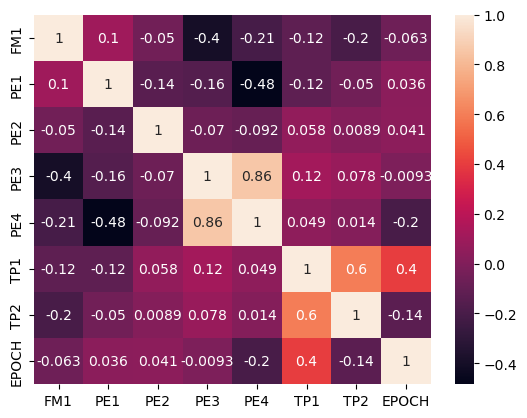

In [5]:
corr1= df1.corr()
corr2= df2.corr()
sns.heatmap(corr1,annot=True)

<AxesSubplot:>

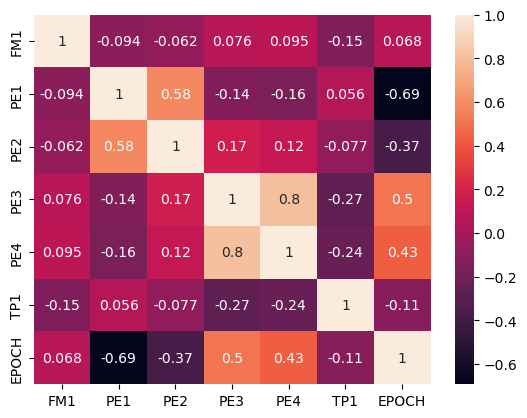

In [6]:
sns.heatmap(corr2,annot=True)

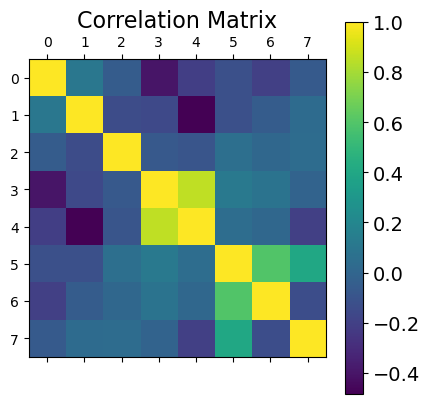

In [7]:
plt.matshow(corr1, 8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

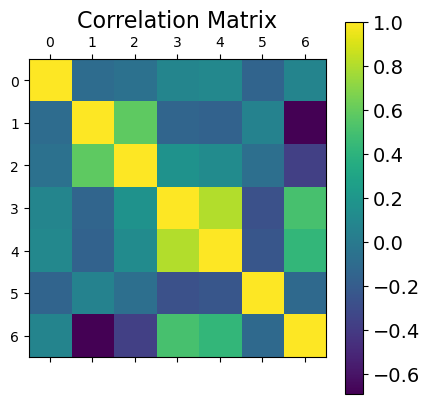

In [8]:
plt.matshow(corr2, 8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

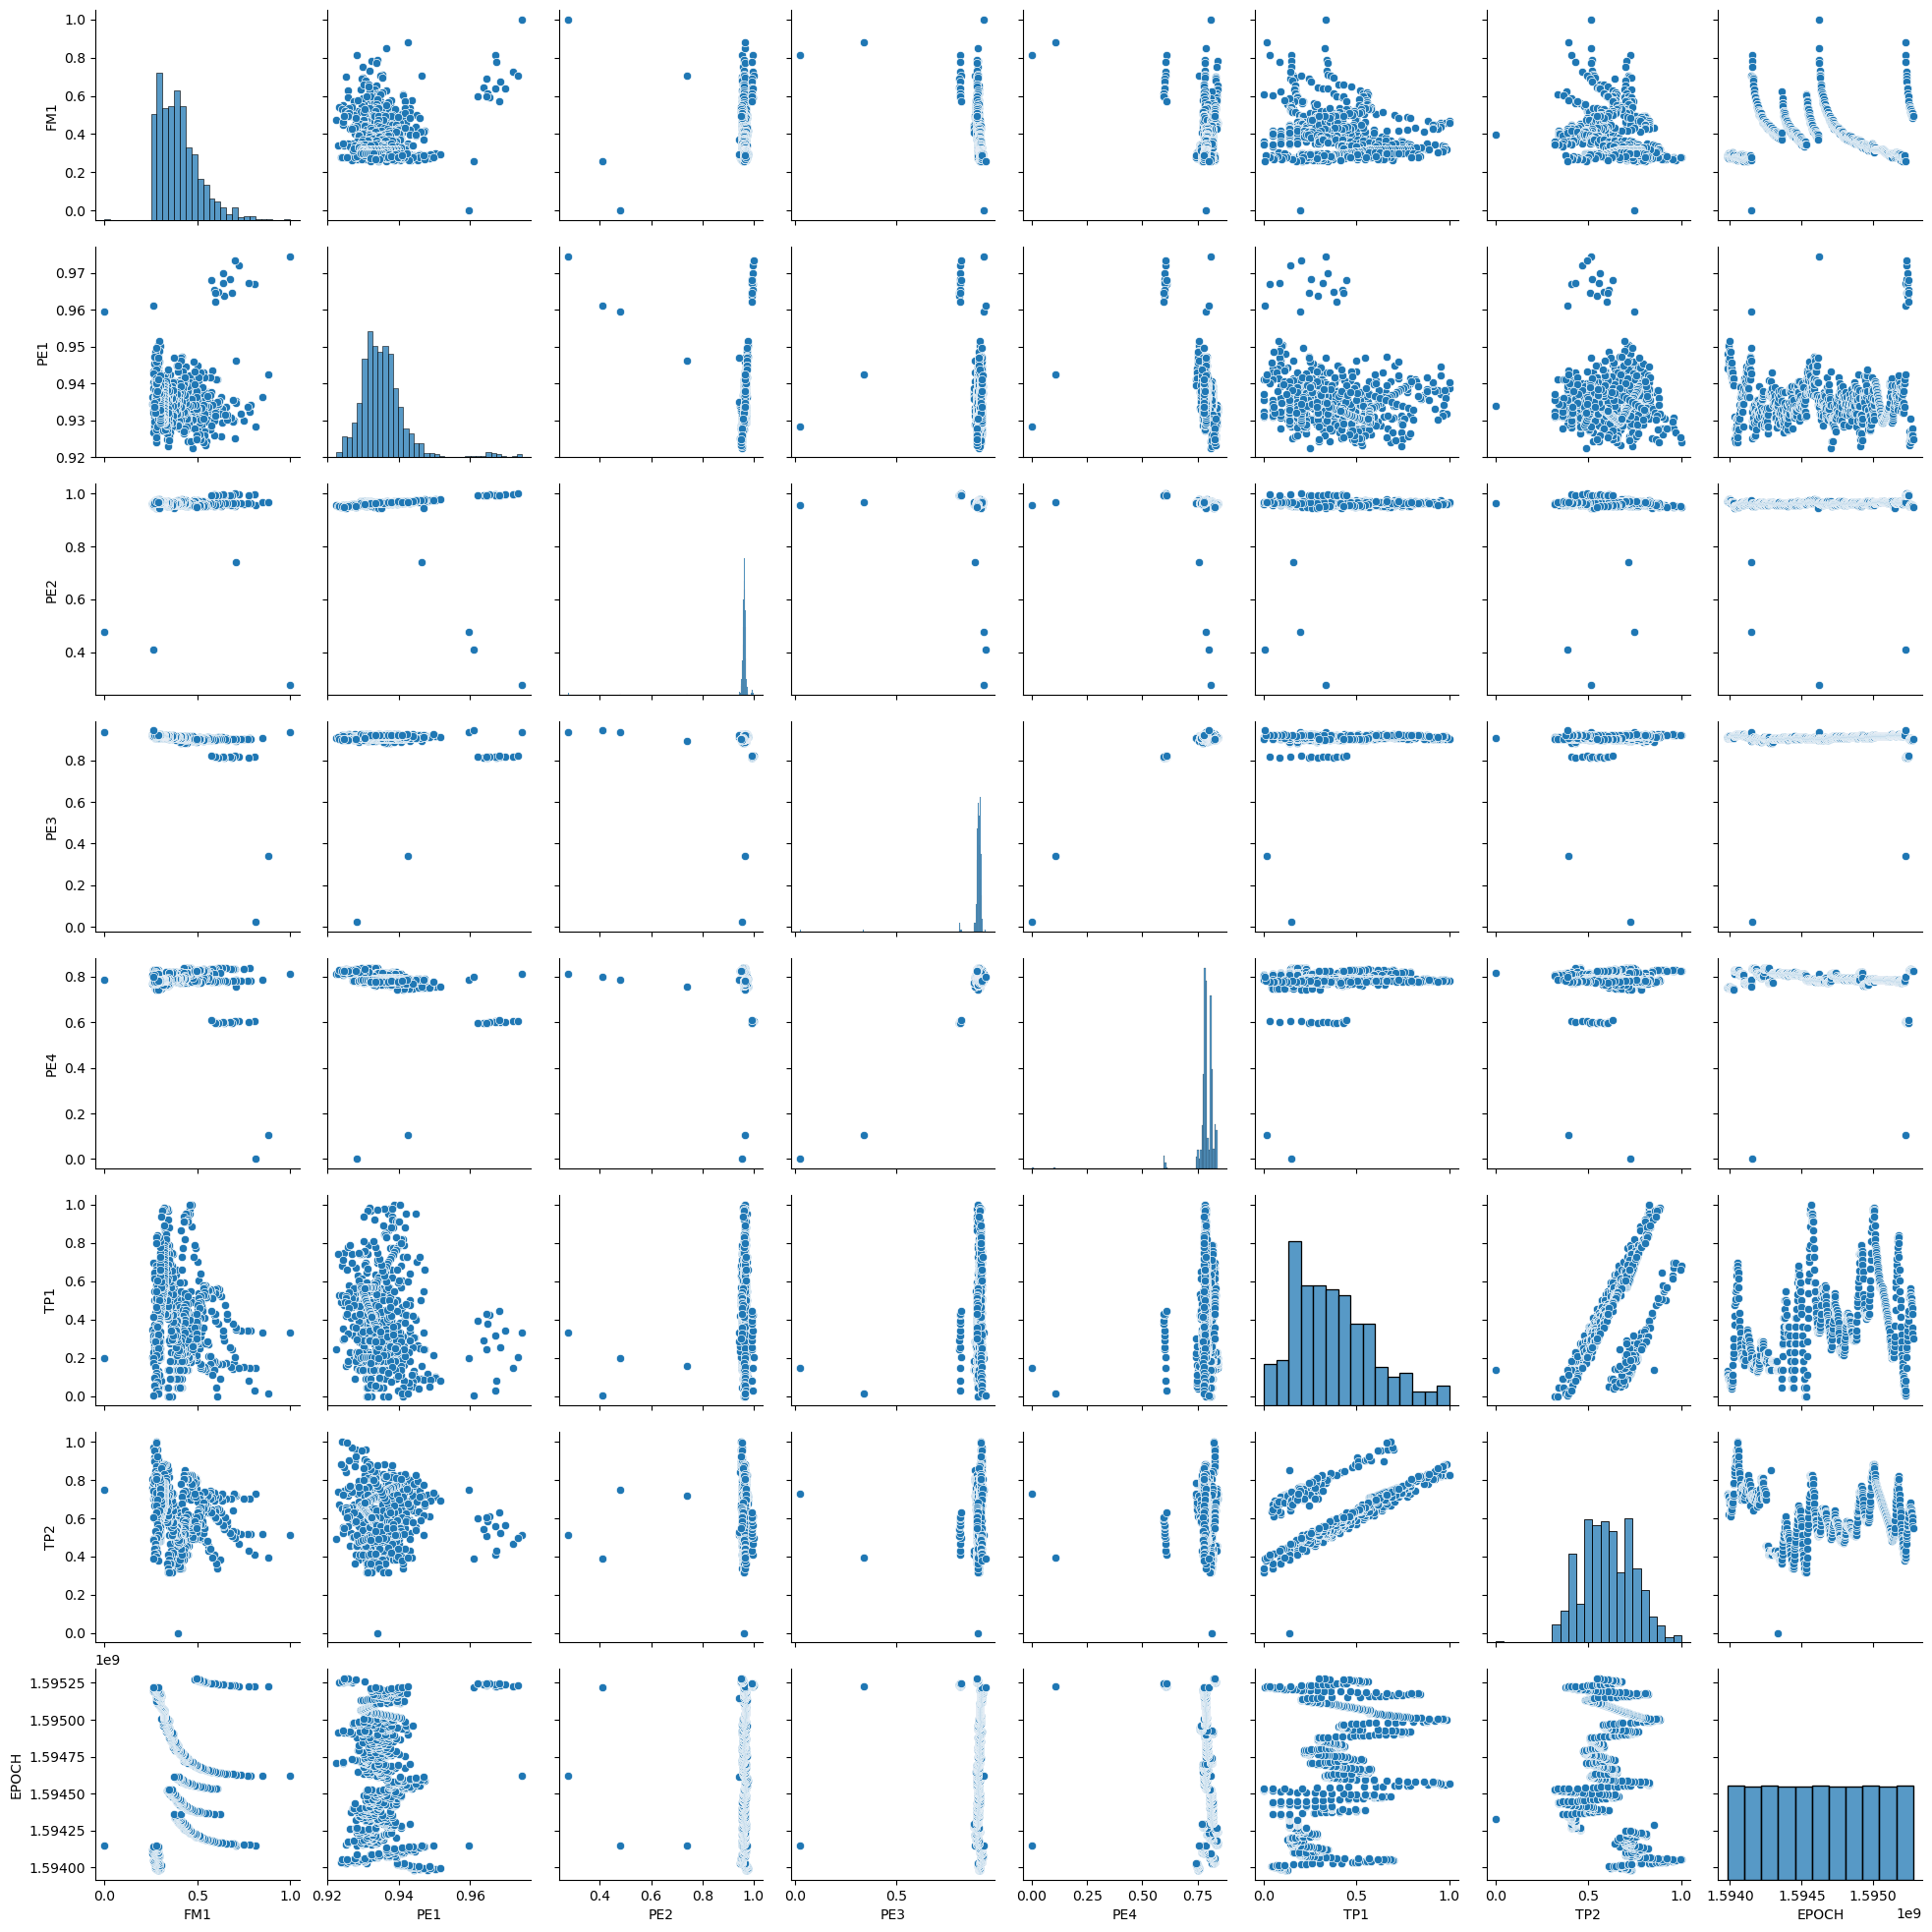

In [9]:
sns.pairplot(df1)

In [10]:
X1= df1.iloc[:,2:].values
y1= df1.iloc[:,1].values

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X1,y1,test_size=0.2, random_state=42)

In [11]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X1, y1, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [12]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

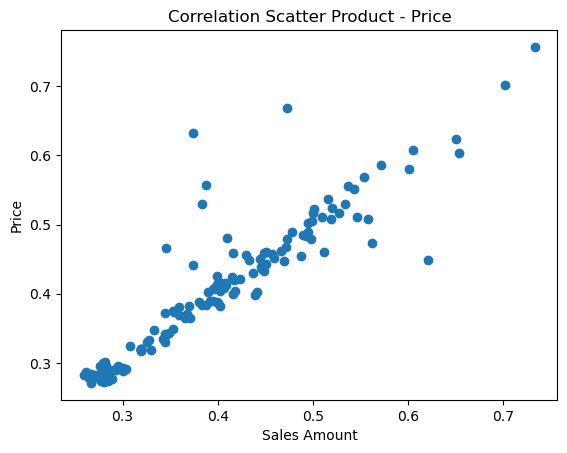

In [13]:
regXGB= XGBRegressor()
regXGB.fit(X_train,y_train)
y_predictions = regXGB.predict(X_test)

plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(y_test, y_predictions)

In [14]:
test_pred = regXGB.predict(X_test)
train_pred = regXGB.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["XGB Regressor", *evaluate(y_test, test_pred) , cross_val(XGBRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.0198642084034729
MSE: 0.001735341044082967
RMSE: 0.041657424837392036
R2 Square 0.8344713062136908
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010129472962937694
MSE: 1.8100381549629743e-06
RMSE: 0.0013453765848129564
R2 Square 0.9998649276704739
__________________________________


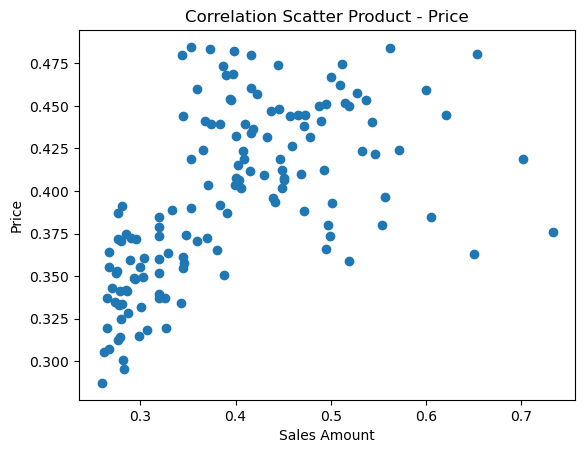

In [15]:
regLR= LinearRegression()
regLR.fit(X_train,y_train)
y_predictions = regLR.predict(X_test)

plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(y_test, y_predictions)

In [16]:
test_pred = regLR.predict(X_test)
train_pred = regLR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.0622892219154996
MSE: 0.0069957295443816535
RMSE: 0.08364047790622464
R2 Square 0.33269948433927354
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06633056045899255
MSE: 0.008782646517077164
RMSE: 0.09371577517727292
R2 Square 0.34460358130391044
__________________________________


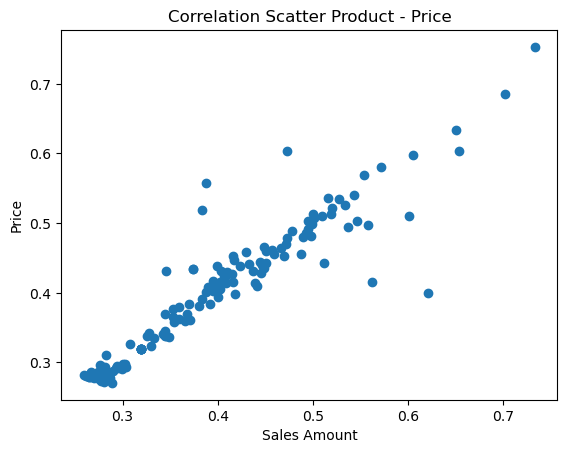

In [17]:
regRF= RandomForestRegressor()
regRF.fit(X_train,y_train)
y_predictions = regRF.predict(X_test)

plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(y_test, y_predictions)

In [18]:
test_pred = regRF.predict(X_test)
train_pred = regRF.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.018947939845138848
MSE: 0.0013655138575685523
RMSE: 0.03695285993760906
R2 Square 0.8697479518731304
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.007565961064756942
MSE: 0.0004359707038941812
RMSE: 0.02087991149153131
R2 Square 0.9674661120161134
__________________________________


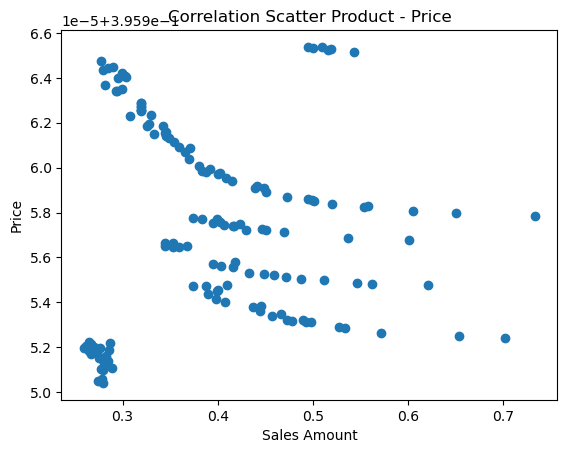

In [19]:
regSVR= SVR()
regSVR.fit(X_train,y_train)
y_predictions = regSVR.predict(X_test)

plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(y_test, y_predictions)

In [20]:
test_pred = regSVR.predict(X_test)
train_pred = regSVR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVR", *evaluate(y_test, test_pred) , cross_val(SVR())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.08290996321620632
MSE: 0.01048401273941623
RMSE: 0.10239146809874458
R2 Square -3.681715006109698e-05
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0862636553265611
MSE: 0.013444904948858647
RMSE: 0.11595216664150199
R2 Square -0.0033129007364181007
__________________________________


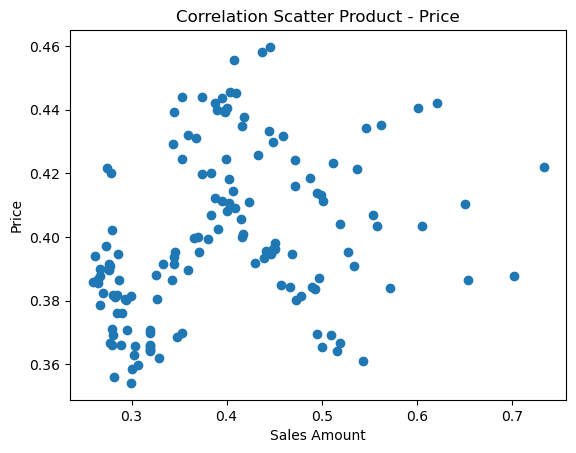

In [21]:
regRidge= Ridge()
regRidge.fit(X_train,y_train)
y_predictions = regRidge.predict(X_test)

plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(y_test, y_predictions)

In [22]:
test_pred = regRidge.predict(X_test)
train_pred = regRidge.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.0794078262655747
MSE: 0.009488478067804383
RMSE: 0.09740881925064272
R2 Square 0.09492408657130147
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.07891015237993095
MSE: 0.010940166667131277
RMSE: 0.10459525164715307
R2 Square 0.18360074726514497
__________________________________


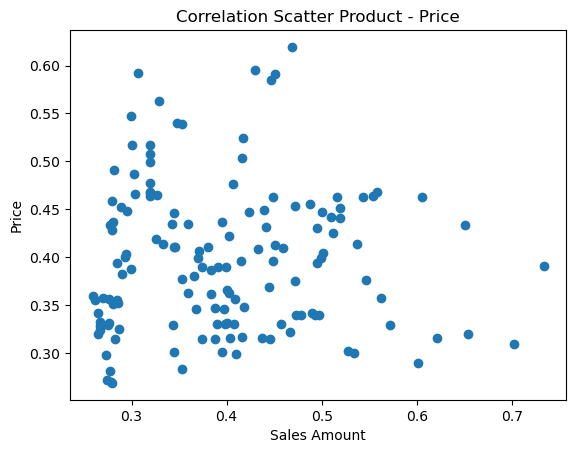

In [23]:
regMLP = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_predictions = regMLP.predict(X_test)

plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(y_test, y_predictions)

In [24]:
test_pred = regMLP.predict(X_test)
train_pred = regMLP.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["MLP", *evaluate(y_test, test_pred) , cross_val(MLPRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.10217133373018408
MSE: 0.01632304841739983
RMSE: 0.1277616860306713
R2 Square -0.5570039632011932
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11447664621593567
MSE: 0.02424349121802634
RMSE: 0.1557032151820454
R2 Square -0.8091468545488498
__________________________________


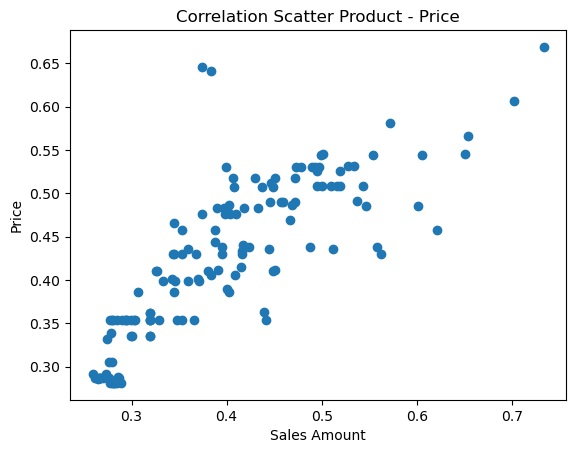

In [25]:
regADA= AdaBoostRegressor()
regADA.fit(X_train,y_train)
y_predictions = regADA.predict(X_test)

plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(y_test, y_predictions)

In [26]:
test_pred = regADA.predict(X_test)
train_pred = regADA.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["ADA Boost", *evaluate(y_test, test_pred) , cross_val(AdaBoostRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.048924921530119014
MSE: 0.004184302900030845
RMSE: 0.06468618786132667
R2 Square 0.6008725801708998
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04388563355601135
MSE: 0.0028225959189543573
RMSE: 0.05312810855803505
R2 Square 0.7893665362585343
__________________________________


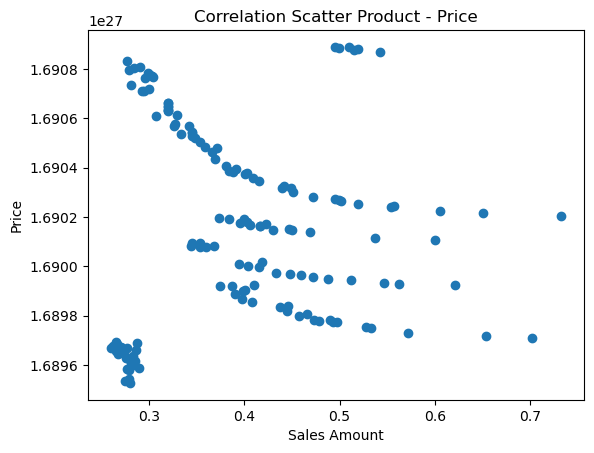

In [27]:
regSGD= SGDRegressor()
regSGD.fit(X_train,y_train)
y_predictions = regSGD.predict(X_test)

plt.xlabel("Sales Amount")
plt.ylabel("Price")
plt.title("Correlation Scatter Product - Price")
plt.scatter(y_test, y_predictions)

In [28]:
test_pred = regSGD.predict(X_test)
train_pred = regSGD.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SGD Regression", *evaluate(y_test, test_pred) , cross_val(SGDRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.6901656959501784e+27
MSE: 2.8566602354929505e+54
RMSE: 1.6901657420185012e+27
R2 Square -2.7248778502920667e+56
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.6902195963733768e+27
MSE: 2.8568424410134315e+54
RMSE: 1.6902196428314966e+27
R2 Square -2.1318907700298908e+56
__________________________________


In [29]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,XGB Regressor,1.986421e-02,1.735341e-03,4.165742e-02,8.344713e-01,-6.052539e+01
1,Linear Regression,6.228922e-02,6.995730e-03,8.364048e-02,3.326995e-01,-2.212541e+01
2,Random Forest,1.894794e-02,1.365514e-03,3.695286e-02,8.697480e-01,-6.356173e+01
3,SVR,8.290996e-02,1.048401e-02,1.023915e-01,-3.681715e-05,-2.516445e+01
4,Ridge,7.940783e-02,9.488478e-03,9.740882e-02,9.492409e-02,-4.773094e+01
5,MLP,1.021713e-01,1.632305e-02,1.277617e-01,-5.570040e-01,-1.082241e+11
6,ADA Boost,4.892492e-02,4.184303e-03,6.468619e-02,6.008726e-01,-1.294593e+01
7,SGD Regression,1.690166e+27,2.856660e+54,1.690166e+27,-2.724878e+56,-5.778256e+57


In [30]:
results_df.fillna(.90,inplace=True)
results_df.style.background_gradient(cmap='coolwarm').format({'MAE': '{:.3}',
                                                                     'MSE': '{:.3}',
                                                                     'RMSE': '{:.3}',
                                                                     'R2 Square': '{:.3}',
                                                                     'Cross Validation': '{:.3}'})

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,XGB Regressor,0.0199,0.00174,0.0417,0.834,-60.5
1,Linear Regression,0.0623,0.007,0.0836,0.333,-22.1
2,Random Forest,0.0189,0.00137,0.037,0.87,-63.6
3,SVR,0.0829,0.0105,0.102,-3.68e-05,-25.2
4,Ridge,0.0794,0.00949,0.0974,0.0949,-47.7
5,MLP,0.102,0.0163,0.128,-0.557,-1.08e+11
6,ADA Boost,0.0489,0.00418,0.0647,0.601,-12.9
7,SGD Regression,1.69e+27,2.86e+54,1.69e+27,-2.72e+56,-5.78e+57
